In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
!pip install catboost
from catboost import CatBoostClassifier, Pool

# Load dataset

In [ ]:

# load dataset
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
df = pd.read_csv("/content/drive/creditcard_2023.csv")
# View top 5 records
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
df.shape

(568630, 31)

### The dataset includes the following features:

*   Id: A one-of-a-kind identification that is assigned to every single transaction.
*   V1–V28: Anonymized features reflecting various transaction attributes (such as time, location, and so on).
*   Amount: the total dollar value of the transaction.
*   Class: A binary label that indicates whether the transaction is fraudulent, with a value of either (1) or (0).


In [ ]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Histograms for 31 attributes presented in the credit-card dataset including amount, class, time, V1 to V28 



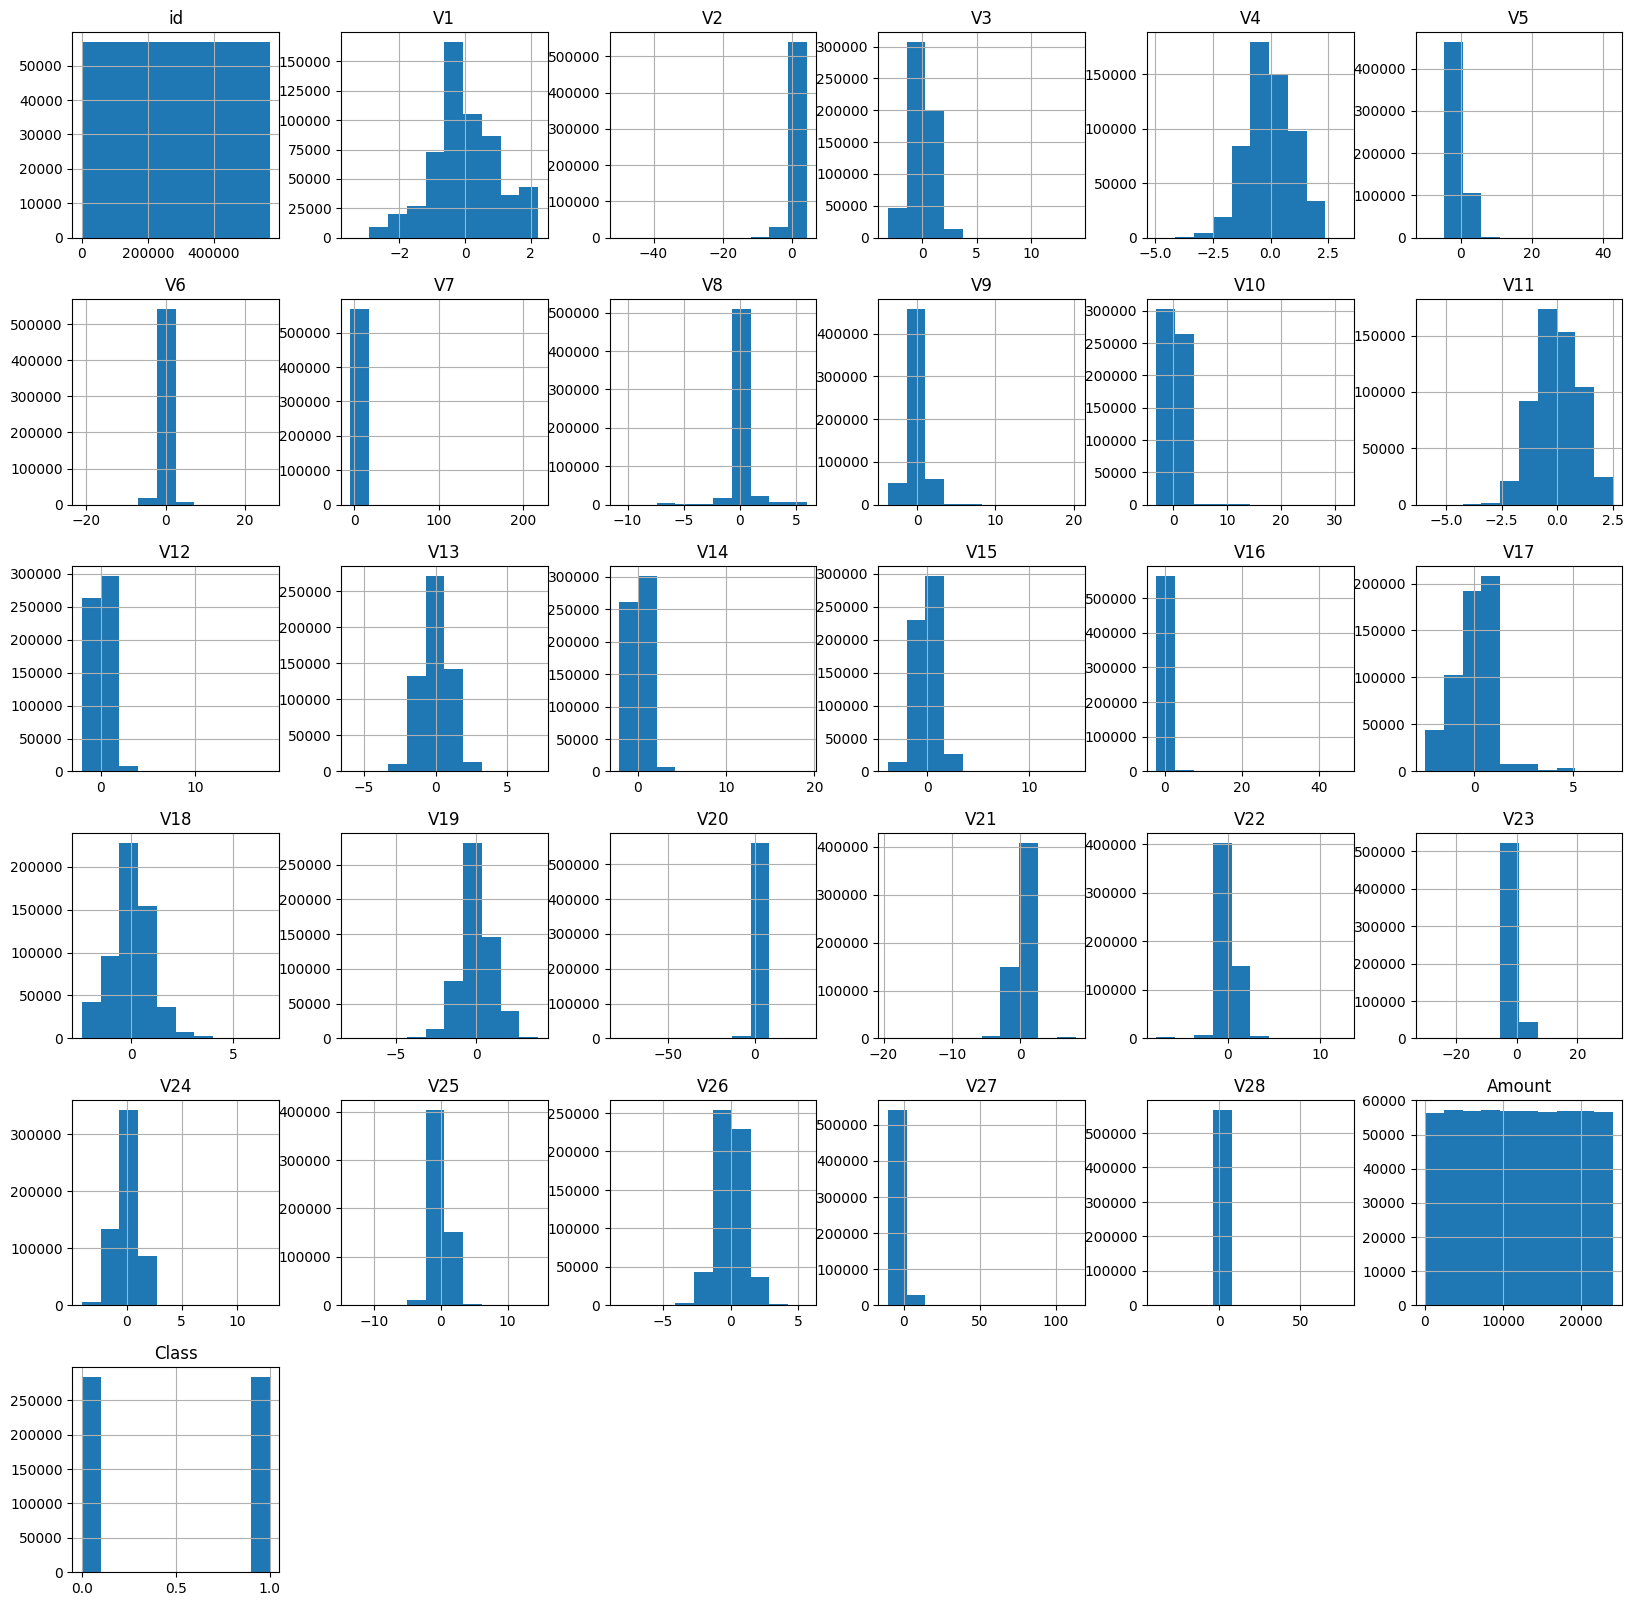

In [ ]:
print("Histograms for 31 attributes presented in the credit-card dataset including amount, class, time, V1 to V28 \n")
hist = df.hist(figsize = (20,20))

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


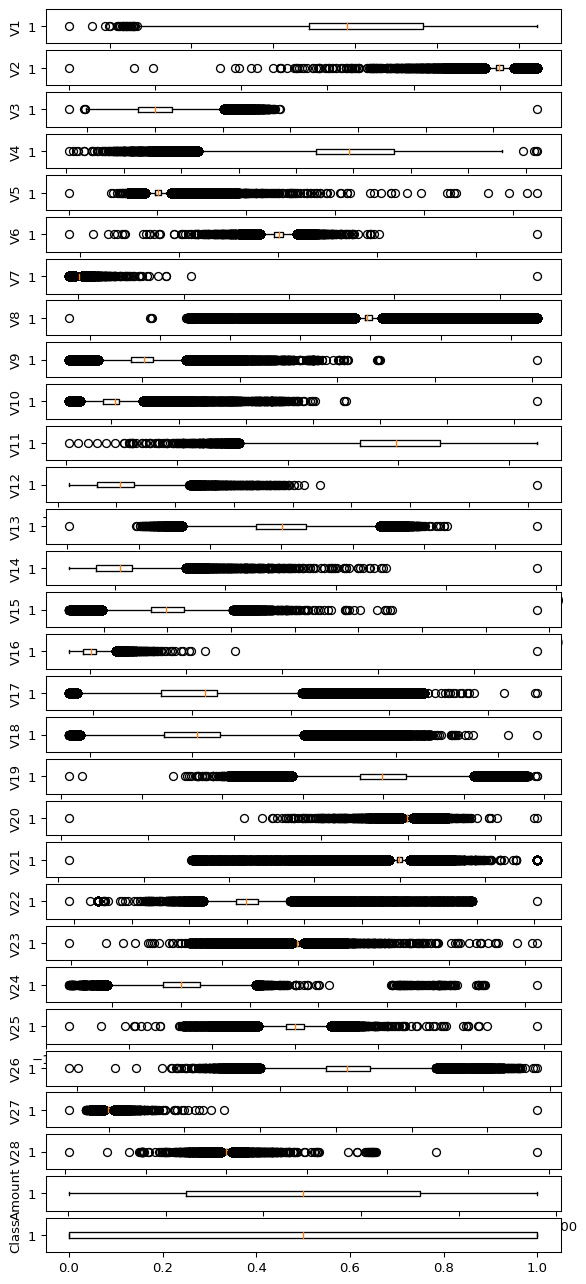

In [ ]:
# box plot
fig, axs = plt.subplots(30,1, dpi=95, figsize=(7,17))
i = 0
for col in df.columns[1:]:
	axs[i].boxplot(df[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()

#Preprocess

In [ ]:
# preprocess
# function for delete outliers
clean_data = df.copy()
def delete_outliers(col_name):
  # Identify the quartiles
  q1, q3 = np.percentile(df[col_name], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  # Drop the outliers
  # print(col_name,len(df[col_name]))
  clean_data = df[(df[col_name] >= lower_bound) & (df[col_name] <= upper_bound)]
  # print(len(clean_data[col_name]))
  return clean_data

In [ ]:
for col in df.columns[1:29]:
  clean_data = delete_outliers(col)
  # print(col)
print("original dataet size: ", df.shape)
print("dataset size after delete outliers: ", clean_data.shape)

original dataet size:  (568630, 31)
dataset size after delete outliers:  (498388, 31)


In [ ]:
# label class
print('Normal transactions count: ', clean_data['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', clean_data['Class'].value_counts().values[1])

Normal transactions count:  273275
Fraudulent transactions count:  225113


In [ ]:
# Separate feature data from labels
X = clean_data.iloc[:, :-1]
# label class
y = clean_data['Class']

In [ ]:
# normalization of the data to work properly
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Partition data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, random_state=42, stratify=y)
print('number of normal transaction in train data:' ,y_train.value_counts().values[0])
print('number of fraudulant transaction in train data:' ,y_train.value_counts().values[1])
print('*'*50)
print('number of normal transaction in test data:' ,y_test.value_counts().values[0])
print('number of fraudulant transaction in test data:' ,y_test.value_counts().values[1])
print('*'*50)
# apply SMOTE over-sampling
sm = SMOTE(random_state= 42)
print('Original dataset shape {}'.format(Counter(y_train)))
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))
X_train, y_train = X_res, y_res

number of normal transaction in train data: 191292
number of fraudulant transaction in train data: 157579
**************************************************
number of normal transaction in test data: 81983
number of fraudulant transaction in test data: 67534
**************************************************
Original dataset shape Counter({0: 191292, 1: 157579})
Resampled dataset shape Counter({1: 191292, 0: 191292})


The dataset is divided into two parts: train and test with 0.70 and 0.30 split.

#Train models

In [ ]:
# train models
# Logistic Regression,

# Train LogisticRegression Model
LR_Classifier = LogisticRegression()
LR_Classifier.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Train XGBoost Classifier Model for find best hyperparameters
param_grid = {
    'n_estimators': [100, 150],    # number of trees
    'learning_rate': [0.1, 0.2],  # learning rate
    'max_depth': [5, 7],             # Depth of trees
    'subsample': [0.8, 1],              # Data sampling ratio
}
XGB_Classifier = XGBClassifier()
# Create the GridSearchCV object
grid_search = GridSearchCV(XGB_Classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# y_pred = model.predict(X_test)
# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")


In [ ]:
# Train XGBoost Classifier Model

XGB_Classifier = XGBClassifier(learning_rate=0.2, max_depth=5, n_estimators=150, subsample=0.8)
XGB_Classifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Train Random Forest Classifier Model
RF_Classifier = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
RF_Classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [ ]:
# Train Extra Trees Classifier Model
ET_Classifier = ExtraTreesClassifier(n_estimators=150, max_depth=5,random_state=42)
ET_Classifier.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=5, n_estimators=150, random_state=42)

In [ ]:
# Create the LightGBM Dataset objects
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.2,
    'num_leaves': 31,
    'max_depth': 5,
    'seed': 42,
    'early_stopping_round': 10,
}

# Train LightGBM model
num_round = 100  # Number of boosting iterations
LGB_Classifier = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# # Make predictions on the test set
# y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)  # Predict probabilities
# y_pred = [1 if x >= 0.5 else 0 for x in y_pred_prob]  # Convert to binary predictions


[LightGBM] [Info] Number of positive: 191292, number of negative: 191292
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.119703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 382584, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [ ]:
# Create the catboost Dataset objects
train_pool = Pool(data=X_train, label=y_train)
test_pool = Pool(data=X_test, label=y_test)

CB_Classifier = CatBoostClassifier(
    iterations=100,
    learning_rate=0.2,
    depth=5,
    loss_function='Logloss',
    verbose=False,
    random_seed=42
)

# Train the model
CB_Classifier.fit(train_pool, eval_set=test_pool, early_stopping_rounds=10)

# # Make predictions on the test data
# y_pred_prob = catboost_model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
# y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# cm = confusion_matrix(y_test, y_pred)

# print(f'Accuracy: {accuracy:.4f}')
# print('Confusion Matrix:')
# print(cm)

#Test models

In [30]:
modlist = [('Logistic Regression', LR_Classifier),('XGBoost Classifier', XGB_Classifier),('RandomForest Classifier', RF_Classifier)
,('Extra Classifier', ET_Classifier), ('LightGBM Classifier', LGB_Classifier),  ('CatBoost Classifier', CB_Classifier)]

train_results = []
test_results = []
for name, model in modlist:
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  # Calculate metrics for train set
  train_accuracy = accuracy_score(y_train, y_train_pred.round())
  train_precision = precision_score(y_train, y_train_pred.round(), average='weighted', zero_division=0)
  train_recall = recall_score(y_train, y_train_pred.round(), average='weighted', zero_division=0)
  train_f1 = f1_score(y_train, y_train_pred.round(), average='weighted', zero_division=0)

  # Calculate metrics for test set
  test_accuracy = accuracy_score(y_test, y_test_pred.round())
  test_precision = precision_score(y_test, y_test_pred.round(), average='weighted', zero_division=0)
  test_recall = recall_score(y_test, y_test_pred.round(), average='weighted', zero_division=0)
  test_f1 = f1_score(y_test, y_test_pred.round(), average='weighted', zero_division=0)

  train_results.append([name, 'Train', train_accuracy, train_precision, train_recall, train_f1])
  test_results.append([name, 'Test', test_accuracy, test_precision, test_recall, test_f1])

metrics_df_train = pd.DataFrame(train_results, columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
metrics_df_test = pd.DataFrame(test_results, columns=['Model', 'Dataset', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

print(metrics_df_train)
print("=" * 80)
print(metrics_df_test)



                     Model Dataset  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression   Train  0.998335   0.998336  0.998335  0.998335
1       XGBoost Classifier   Train  1.000000   1.000000  1.000000  1.000000
2  RandomForest Classifier   Train  0.999726   0.999726  0.999726  0.999726
3         Extra Classifier   Train  0.967516   0.969455  0.967516  0.967482
4      LightGBM Classifier   Train  0.999854   0.999854  0.999854  0.999854
5      CatBoost Classifier   Train  0.999773   0.999773  0.999773  0.999773
                     Model Dataset  Accuracy  Precision    Recall  F1-Score
0      Logistic Regression    Test  0.998575   0.998576  0.998575  0.998575
1       XGBoost Classifier    Test  0.999746   0.999746  0.999746  0.999746
2  RandomForest Classifier    Test  0.999679   0.999679  0.999679  0.999679
3         Extra Classifier    Test  0.970853   0.972273  0.970853  0.970746
4      LightGBM Classifier    Test  0.999686   0.999686  0.999686  0.999686
5      CatBo

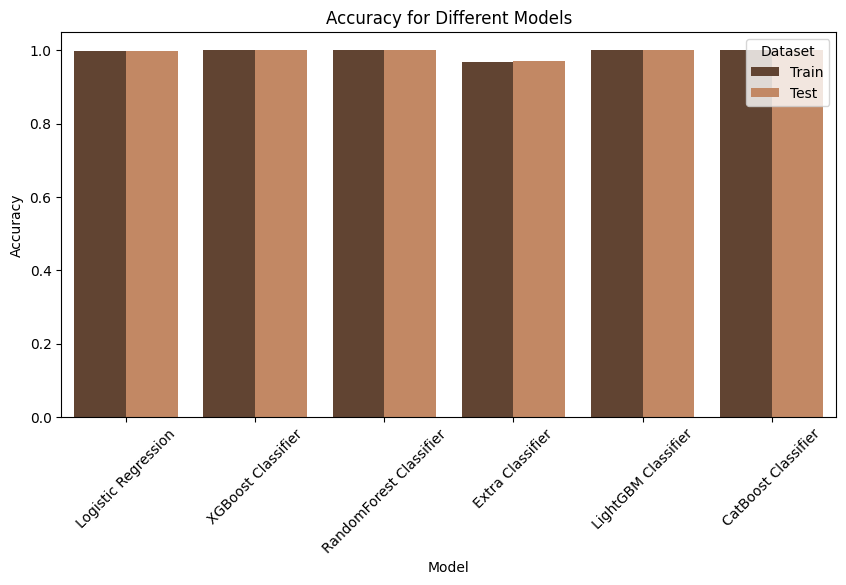

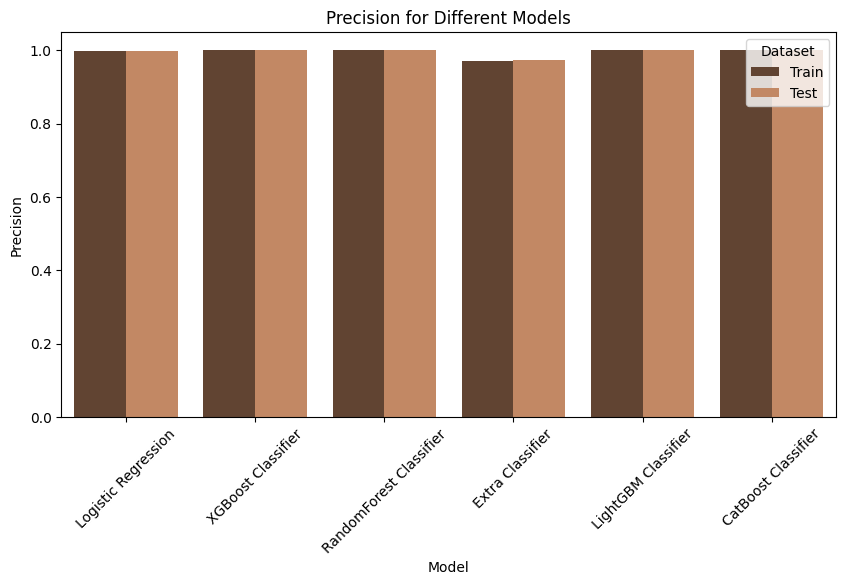

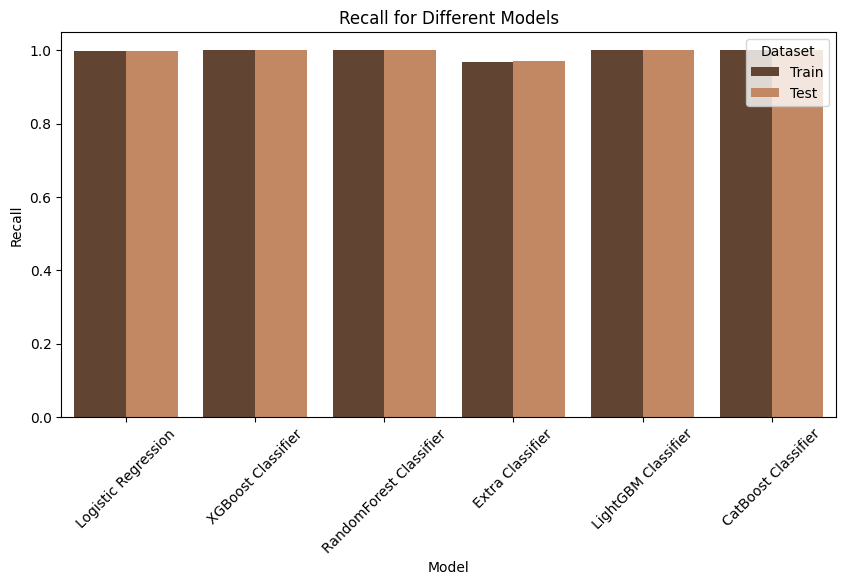

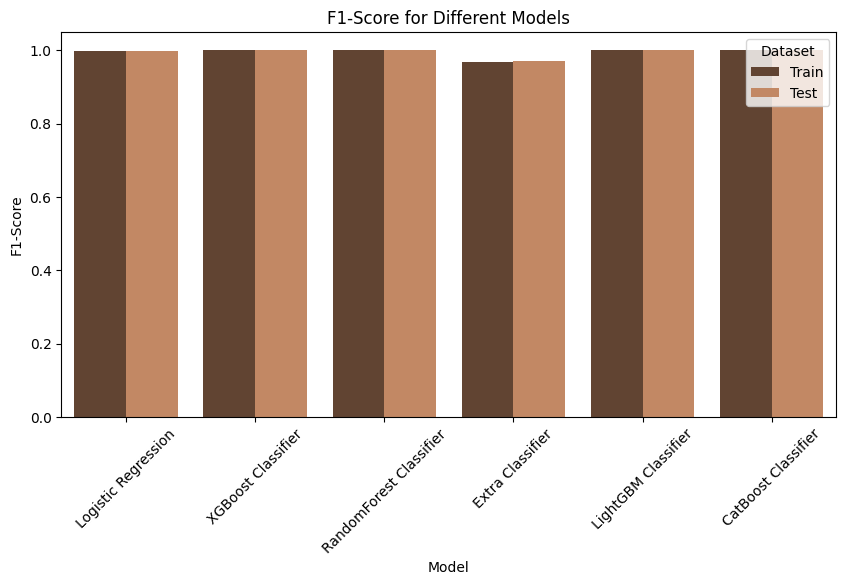

In [50]:
results = [metrics_df_train, metrics_df_test]
metrics_df = pd.concat(results)

# Function to create a bar plot for each metric
def plot_metric(metric_name):
    plt.figure(figsize=(10,5))
    sns.barplot(x='Model', y=metric_name, hue='Dataset', data=metrics_df, palette='copper')
    plt.title(f'{metric_name} for Different Models')
    plt.ylabel(metric_name)
    plt.xticks(rotation=45)
    plt.legend(title='Dataset', loc='upper right')
    plt.show()

# Plot each metric
plot_metric('Accuracy')
plot_metric('Precision')
plot_metric('Recall')
plot_metric('F1-Score')

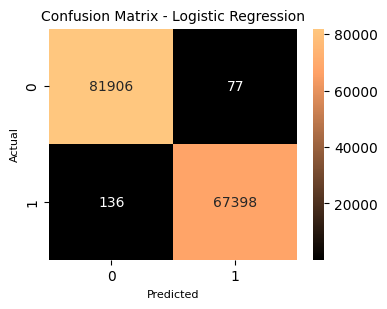

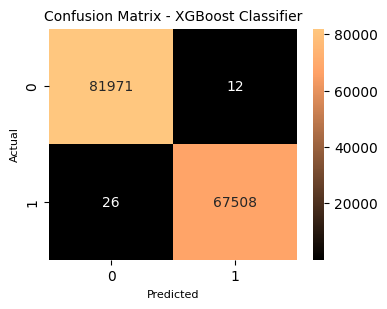

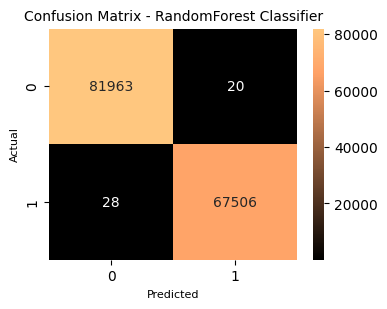

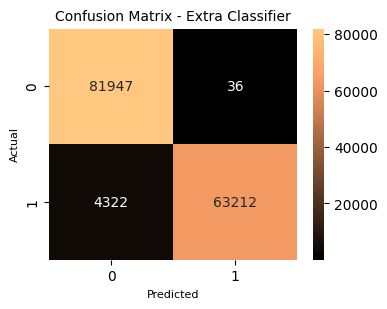

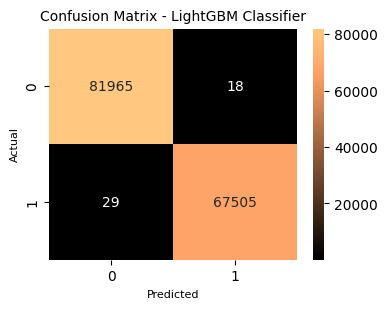

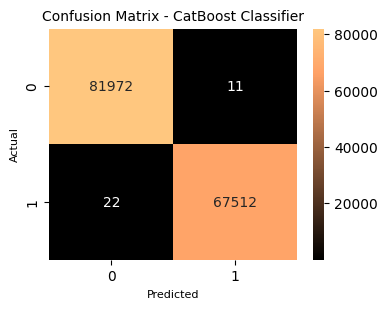

In [52]:
# Function to plot a confusion matrix for test dataset
def plot_confusion_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred.round())

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='copper', cbar=True, annot_kws={"size": 10})
    plt.title(f'Confusion Matrix - {model_name}', fontsize=10)
    plt.ylabel('Actual', fontsize=8)
    plt.xlabel('Predicted', fontsize=8)
    plt.show()

for name, model in modlist:
    y_test_pred = model.predict(X_test)

    plot_confusion_matrix(name, y_test, y_test_pred)